# View Activations from GoogLeNet

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
from keras.layers import Input
from keras.models import Model

In [2]:
# To avoid: 
# StdErr from Kernel Process OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5 already initialized. 
# OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program.

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
model = InceptionV3(input_tensor=Input(shape=(375, 375, 3)))
layers = model.layers
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 375, 375, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 187, 187, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 187, 187, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

Inception V3 was trained to object detection. It should be able to find interesting features from a photograph of some violets.

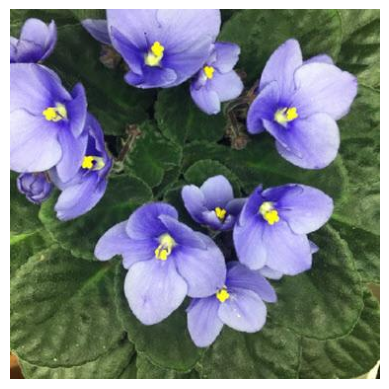

In [4]:
violet = cv.imread("../data/violet.jpg")
violet = cv.cvtColor(violet, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(violet)
plt.axis("off")
plt.show()

We can extract features from an input image using a CNN. The first convolution layer in Inception V3 is named "conv2d (Conv2D)". We can see this by viewing the network's layers.

In [5]:
conv_layer = layers[1]
violet_conv = conv_layer(tf.expand_dims(violet.astype(float), axis=0))

In [6]:
def show_comparison_for_channel(original_image, activation, channel):
    activation_channel = activation[0, :, :, channel]
    normalized_activation_channel = (activation_channel - tf.math.reduce_min(activation_channel)) / (tf.math.reduce_max(activation_channel) - tf.math.reduce_min(activation_channel))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle("Compare channel " + str(channel))

    ax1.imshow(original_image)
    ax1.axis("off")

    ax2.imshow(cv.resize(normalized_activation_channel.numpy(), original_image.shape[:2]), cmap='gray')
    ax2.axis("off")

    plt.show()

Each convolution layer consists of many 2-D arrays called channels. The "conv2d (Conv2D)" layer has 32 channels, so it is difficult to inspect all channels at once.
We will display the activations from a specific channel.
A white pixel indicates that the channel is positively activated at that position. A black pixel is where the channel activated negatively.

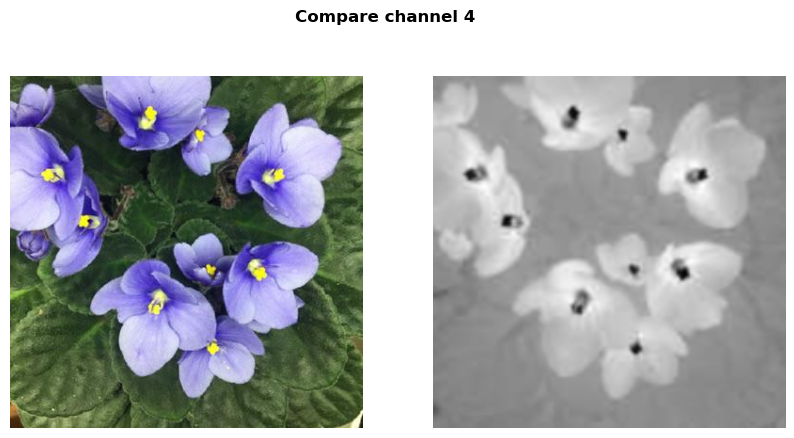

In [7]:
show_comparison_for_channel(violet, violet_conv, 4)

Channel 5 activates on colors with high blue values, such as violet. Channel 14 activates on edges from light to dark.

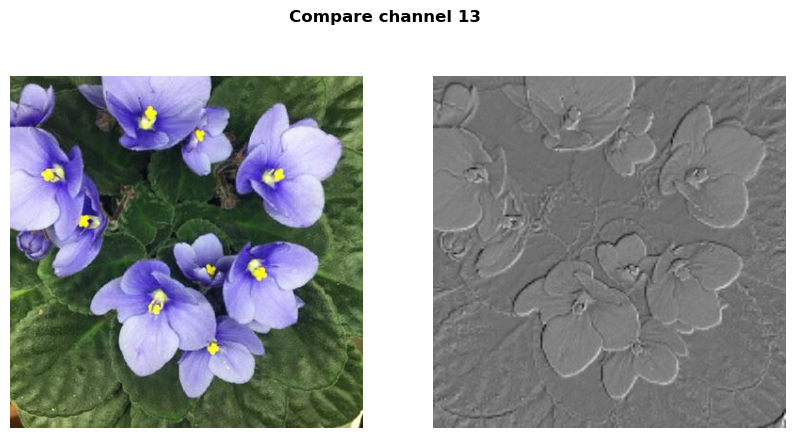

In [8]:
show_comparison_for_channel(violet, violet_conv, 13)

Most CNNs learn to detect features like color and edges in the first convolution layer. In deeper layers, the network learns more complicated features.

In [9]:
deep_layer_model = Model(inputs=model.input,
                         outputs=model.get_layer("mixed10").output)
violet_deep_output = deep_layer_model.predict(tf.expand_dims(violet.astype(float), axis=0), verbose=False)

The "mixed10" layer contains 2048 channels.

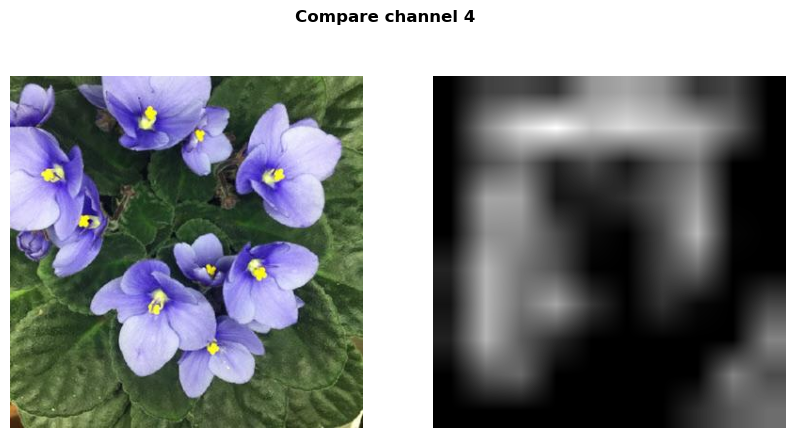

In [10]:
show_comparison_for_channel(violet, violet_deep_output, 4)